<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Car Acceptability Dataset

*   buying: buying price
*   maint: price of the maintenance
*   doors: number of doors
*   persons: capacity in terms of persons to carry
*   lug_boot: the size of luggage boot
*   safety: estimated safety of the car
*   class: unacceptable, acceptable, good, very good

In [217]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [219]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


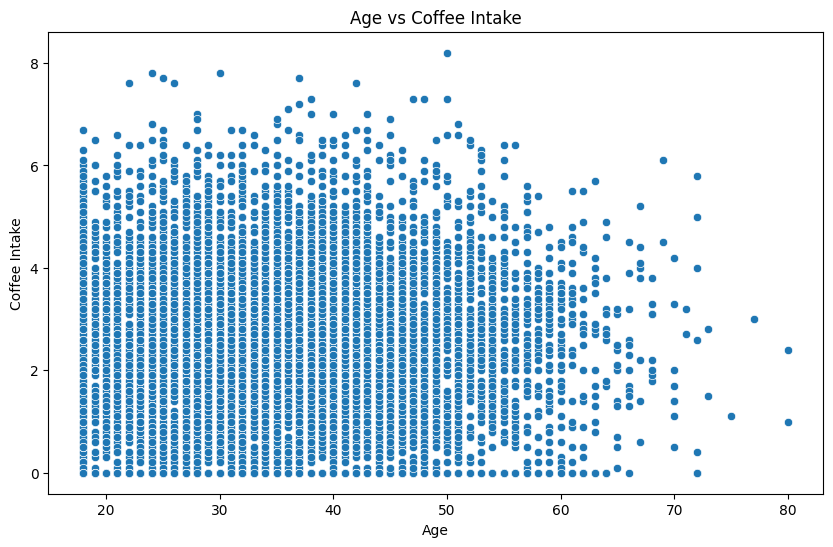

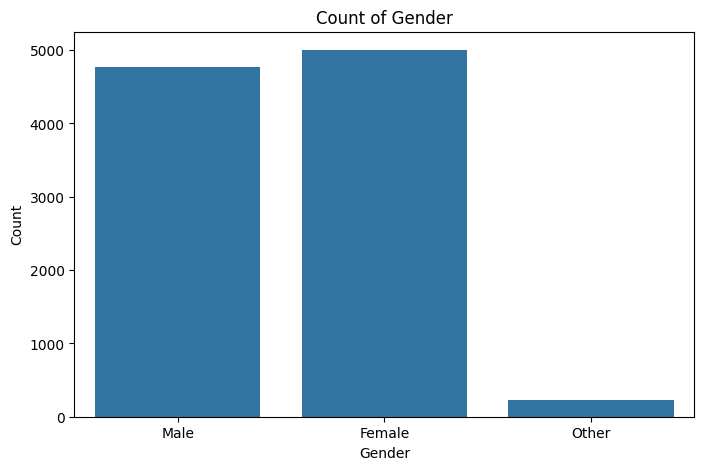

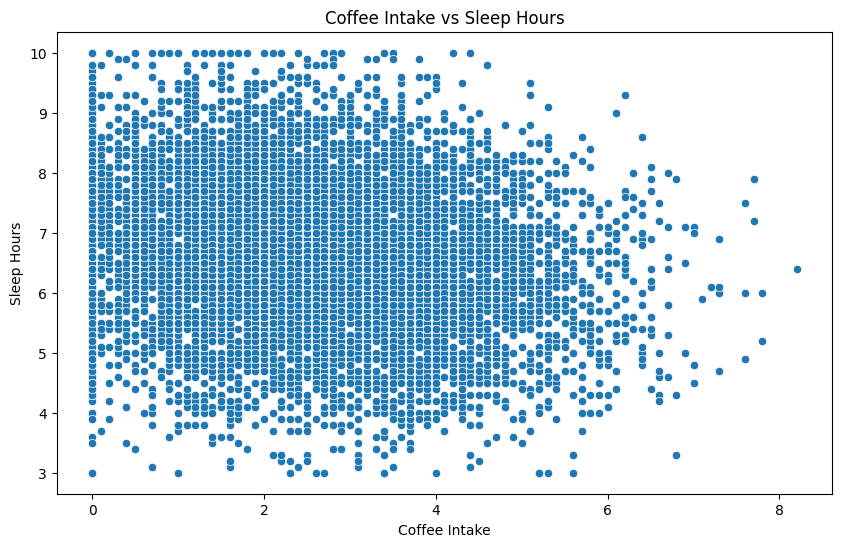

In [220]:
# Visualize the relationship between 'Age' and 'Coffee_Intake'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Coffee_Intake', data=df)
plt.title('Age vs Coffee Intake')
plt.xlabel('Age')
plt.ylabel('Coffee Intake')
plt.show()

# Visualize the count of 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between 'Coffee_Intake' and 'Sleep_Hours'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coffee_Intake', y='Sleep_Hours', data=df)
plt.title('Coffee Intake vs Sleep Hours')
plt.xlabel('Coffee Intake')
plt.ylabel('Sleep Hours')
plt.show()

In [221]:
df = df.drop(columns=['ID'])
targetclass= df['Health_Issues']
df = df.drop(columns=['Country'])

In [222]:
# check missing values in variables

df.isnull().sum()





,0
Age,0
Gender,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0
Physical_Activity_Hours,0


In [223]:
# Select object type columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display the selected columns
print("Columns that need encoding:")
print(categorical_cols)

# Display the head of the DataFrame with only these columns
display(df[categorical_cols].head())

Columns that need encoding:
Index(['Gender', 'Sleep_Quality', 'Stress_Level', 'Health_Issues',
       'Occupation'],
      dtype='object')


,Gender,Sleep_Quality,Stress_Level,Health_Issues,Occupation
0,Male,Good,Low,NaN,Other
1,Male,Good,Low,NaN,Service
2,Male,Fair,Medium,Mild,Office
3,Male,Good,Low,Mild,Other
4,Female,Fair,Medium,Mild,Student


In [224]:
# Select object type columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display the number of unique values in each categorical column
print("Number of unique values in each categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")

Number of unique values in each categorical column:
Gender: 3
Sleep_Quality: 4
Stress_Level: 3
Health_Issues: 3
Occupation: 5


In [225]:
# Define ordinal mapping for Sleep_Quality and Stress_Level
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
Health_Issues_map = {'None': 0, 'Mild': 1, 'Moderate':2, 'Severe': 3}


# Apply ordinal encoding
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(Health_Issues_map)

# Fill missing values in 'Health_Issues' with 0
df['Health_Issues'] = df['Health_Issues'].fillna(0)


# Select remaining object type columns for one-hot encoding
categorical_cols_onehot = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on remaining categorical columns and convert to int
df = pd.get_dummies(df, columns=categorical_cols_onehot, drop_first=True).astype(int)

display(df.head())
df.info()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Smoking,Alcohol_Consumption,Gender_Male,Gender_Other,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3,328,7,3,24,78,1,14,0,0,0,1,0,0,1,0,0
1,33,1,94,6,3,20,67,1,11,0,0,0,1,0,0,0,1,0
2,42,5,503,5,2,22,59,2,11,1,0,0,1,0,1,0,0,0
3,53,2,249,7,3,24,71,1,6,1,0,0,1,0,0,1,0,0
4,32,3,298,5,2,24,76,2,8,1,0,1,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      10000 non-null  int64
 1   Coffee_Intake            10000 non-null  int64
 2   Caffeine_mg              10000 non-null  int64
 3   Sleep_Hours              10000 non-null  int64
 4   Sleep_Quality            10000 non-null  int64
 5   BMI                      10000 non-null  int64
 6   Heart_Rate               10000 non-null  int64
 7   Stress_Level             10000 non-null  int64
 8   Physical_Activity_Hours  10000 non-null  int64
 9   Health_Issues            10000 non-null  int64
 10  Smoking                  10000 non-null  int64
 11  Alcohol_Consumption      10000 non-null  int64
 12  Gender_Male              10000 non-null  int64
 13  Gender_Other             10000 non-null  int64
 14  Occupation_Office        10000 non-null  int64
 15  Occ

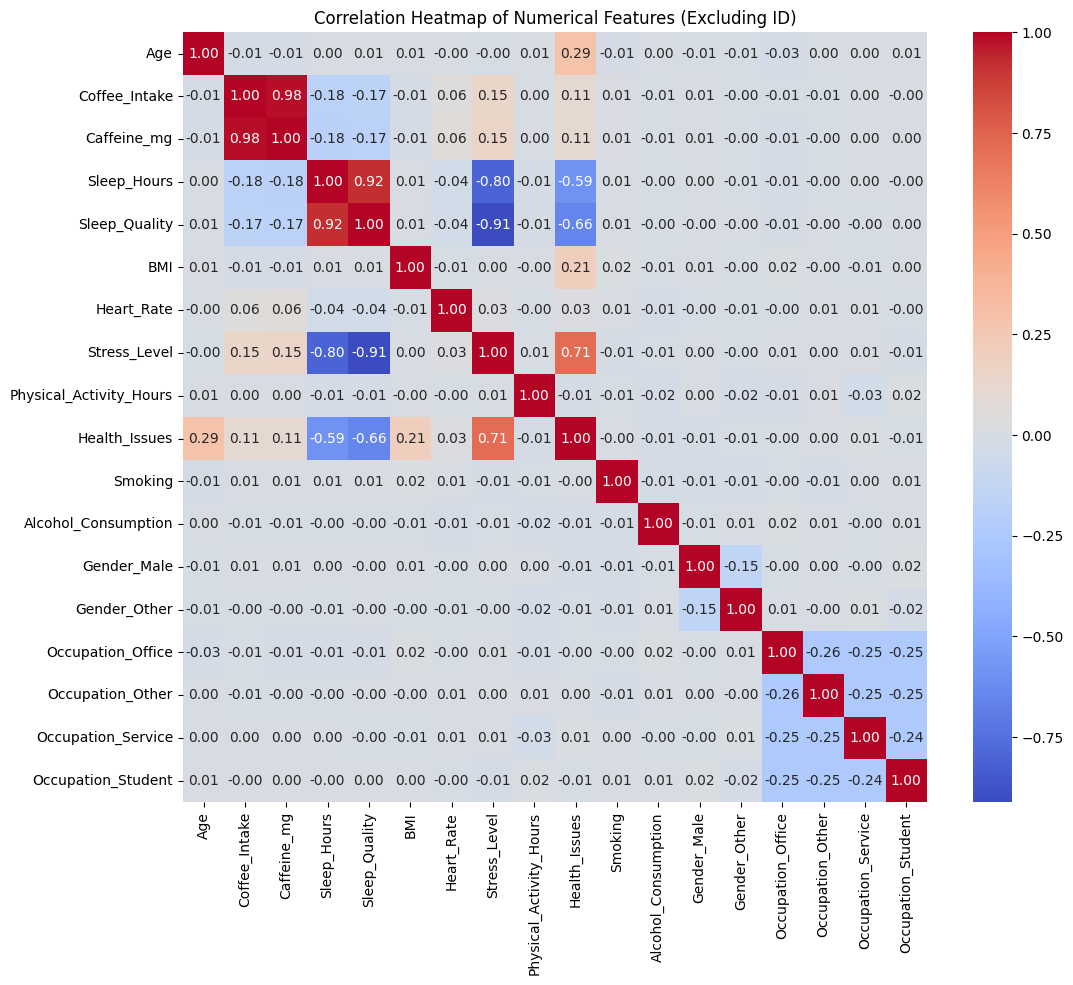

In [226]:
# Select numerical columns for the heatmap
numerical_df = df.select_dtypes(include=['int64', 'float64','bool'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features (Excluding ID)')
plt.show()

In [227]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations with 'Health_Issues'
health_issues_corr = correlation_matrix['Health_Issues']

# Identify columns with correlation of 0.01 or below with 'Health_Issues' (excluding 'Health_Issues' itself)
cols_to_drop = health_issues_corr[abs(health_issues_corr) <= 0.01].index.tolist()
if 'Health_Issues' in cols_to_drop:
    cols_to_drop.remove('Health_Issues')


print(f"Columns with near zero correlation to Health_Issues: {cols_to_drop}")

# Drop the identified columns
df = df.drop(columns=cols_to_drop)

print("\nDataFrame after dropping columns:")
display(df.head())
df.info()

Columns with near zero correlation to Health_Issues: ['Smoking', 'Gender_Male', 'Gender_Other', 'Occupation_Office', 'Occupation_Other', 'Occupation_Student']

DataFrame after dropping columns:


,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Alcohol_Consumption,Occupation_Service
0,40,3,328,7,3,24,78,1,14,0,0,0
1,33,1,94,6,3,20,67,1,11,0,0,1
2,42,5,503,5,2,22,59,2,11,1,0,0
3,53,2,249,7,3,24,71,1,6,1,0,0
4,32,3,298,5,2,24,76,2,8,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      10000 non-null  int64
 1   Coffee_Intake            10000 non-null  int64
 2   Caffeine_mg              10000 non-null  int64
 3   Sleep_Hours              10000 non-null  int64
 4   Sleep_Quality            10000 non-null  int64
 5   BMI                      10000 non-null  int64
 6   Heart_Rate               10000 non-null  int64
 7   Stress_Level             10000 non-null  int64
 8   Physical_Activity_Hours  10000 non-null  int64
 9   Health_Issues            10000 non-null  int64
 10  Alcohol_Consumption      10000 non-null  int64
 11  Occupation_Service       10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


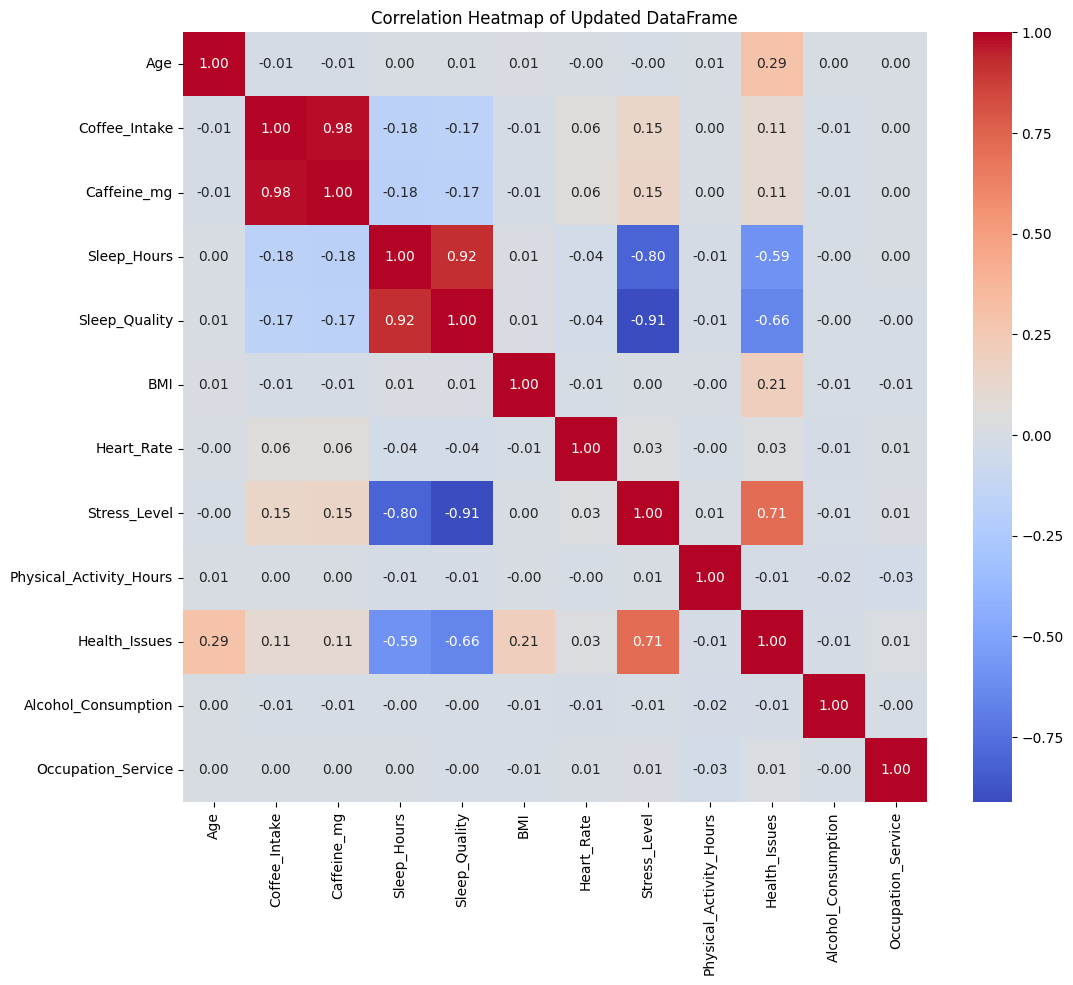

In [228]:
# Calculate the correlation matrix for the updated DataFrame
correlation_matrix_new = df.corr()

# Create the heatmap for the updated DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Updated DataFrame')
plt.show()

# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [229]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [230]:
X.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Alcohol_Consumption,Occupation_Service
0,40,3,328,7,3,24,78,1,14,0,0
1,33,1,94,6,3,20,67,1,11,0,1
2,42,5,503,5,2,22,59,2,11,0,0
3,53,2,249,7,3,24,71,1,6,0,0
4,32,3,298,5,2,24,76,2,8,1,0


In [231]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [232]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [233]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [234]:
X_train.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Alcohol_Consumption,Occupation_Service
9254,37,4,405,5,2,18,86,2,2,1,1
1561,26,0,0,5,2,28,75,2,10,0,0
1670,32,2,268,7,3,27,69,1,8,0,0
6087,18,2,208,8,4,16,83,1,8,1,0
6669,43,2,251,9,4,25,68,1,3,0,0


In [235]:
X_test.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Alcohol_Consumption,Occupation_Service
6252,66,2,245,6,3,30,76,1,1,1,1
4684,22,3,293,7,3,20,69,1,5,0,1
1731,30,3,372,6,3,27,75,1,13,0,0
4742,35,1,92,5,2,23,71,2,2,0,1
4521,47,1,119,6,3,28,64,1,9,0,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [236]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [237]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [238]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [239]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9970


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[4] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[5] <= 29.5\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[5] <= 30.5\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.157\nsamples = 70\nvalue = [0, 6, 64, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 76, 0]'),
 Text(0.375, 0.5, 'x[5] <= 29.5\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[5] <= 29.5\ng

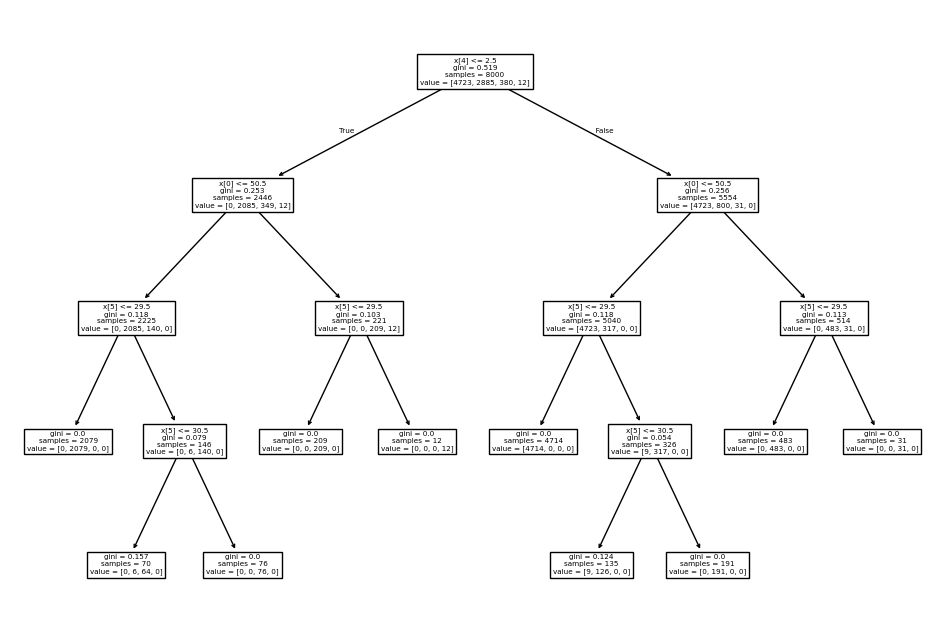

In [240]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [241]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [242]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [243]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9970


### Visualize decision-trees

[Text(0.5, 0.875, 'x[4] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 29.5\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[5] <= 29.5\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 29.5\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples 

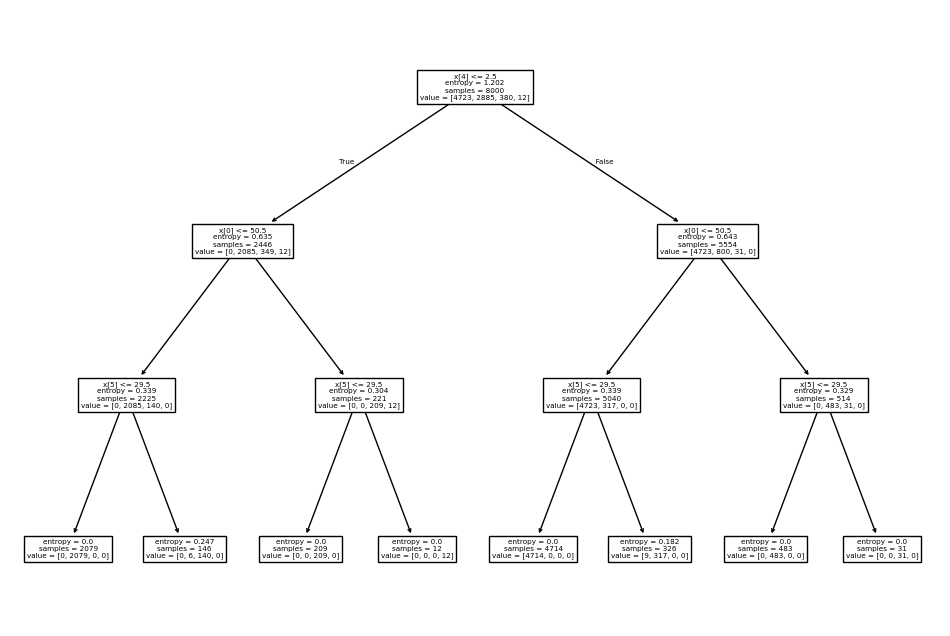

In [244]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [245]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [246]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [247]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8575


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [248]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      1.00       694
           2       0.99      1.00      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [249]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      1.00       694
           2       0.99      1.00      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [250]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.88      0.70      0.78       694
           2       0.69      0.13      0.22        83
           3       1.00      0.40      0.57         5

    accuracy                           0.86      2000
   macro avg       0.86      0.56      0.62      2000
weighted avg       0.85      0.86      0.84      2000



In [251]:
print("\n--- Predicting on New Data ---")
new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Occupation': 'Student',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 'Poor',
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 'High',
    'Physical_Activity_Hours': 2,
    'Smoking': 1,  # Assuming 1 for Yes, 0 for No based on training data
    'Alcohol_Consumption': 1 # Assuming 1 for Yes, 0 for No based on training data
}

# Create a DataFrame for the new data
new_df = pd.DataFrame([new_data])

# Apply the same encoding as the training data
# Ordinal mapping
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
Health_Issues_map = {'None': 0, 'Mild': 1, 'Moderate':2, 'Severe': 3}

new_df['Sleep_Quality'] = new_df['Sleep_Quality'].map(sleep_quality_map)
new_df['Stress_Level'] = new_df['Stress_Level'].map(stress_level_map)

# Select remaining object type columns for one-hot encoding in the new data
# These should be 'Gender', 'Country', and 'Occupation'
categorical_cols_onehot_new_data = new_df.select_dtypes(include=['object']).columns


# Perform one-hot encoding on remaining categorical columns and convert to int
new_df = pd.get_dummies(new_df, columns=categorical_cols_onehot_new_data, drop_first=True).astype(int)


# Align columns with the training set (X_train)
# This ensures the new data has the same columns in the same order
# It will add missing columns (for other countries, occupations, etc.) and fill them with 0
new_df_aligned = new_df.reindex(columns=X_train.columns, fill_value=0)


# Use the trained model (e.g., clf_gini) to make the prediction
# Make sure clf_gini or another trained model is available in the environment
prediction = clf_gini.predict(new_df_aligned)

# Map the predicted number back to the original label
inverse_health_map = {v: k for k, v in Health_Issues_map.items()}
predicted_class = inverse_health_map[prediction[0]]

print(f"\nNew data to predict:\n {new_data}")
print(f"\nPredicted Health Issues: {predicted_class}")


--- Predicting on New Data ---

New data to predict:
 {'Age': 28, 'Gender': 'Male', 'Country': 'Brazil', 'Occupation': 'Student', 'Coffee_Intake': 3, 'Caffeine_mg': 280, 'Sleep_Hours': 5, 'Sleep_Quality': 'Poor', 'BMI': 25.4, 'Heart_Rate': 85, 'Stress_Level': 'High', 'Physical_Activity_Hours': 2, 'Smoking': 1, 'Alcohol_Consumption': 1}

Predicted Health Issues: Mild
